In [35]:
import pandas as pd

# Read the data from the file into a dataframe
df = pd.read_csv('data.txt')
#df=df.drop(["idle_time","idle_men","no_of_style_change"],axis=1)
df.isnull().sum().sum() #506 valores en blanco de wip, se reemplazarán con 0
df['wip'] = df['wip'].fillna(0)

# Display the dataframe
df.shape 
df.head()


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


## Limpieza de datos

In [36]:
column_types = df.dtypes
print(column_types)

date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object


In [37]:
df['department'] = df['department'].str.replace(' ', '')
df['department'].unique() # 2 departamentos: sweing y finishing
df['department'].value_counts() # 691 datos de sweing y 506 de finishing
df['quarter'].unique() # 5 quarters
df['day'].unique() #trabajan todos los días menos los Viernes (Friday)
df['team'].unique() # Hay 12 equipos en total (del 1 al 12)
df['targeted_productivity'].describe()[['min', 'max']] #Rango de 0 a 1, con mínimo de 0.07 y máximo de 0.8 si
df['smv'].describe() #Rango de 2.9 a 54.56 con promedio de 15.0622
df['wip'].describe() #Rango de 0 a 23122 con promedio de 687.23
df['over_time'].describe() #Rango de 0 a 25920 con promedio de 4567.46
df['incentive'].describe() #Rango de 0 a 3600 con promedio de 38.21
df['idle_time'].describe() #Rango de 0 a 3000 con promedio 0.73
df['idle_men'].describe() #Rango de 0 a 45 con promedio de 0.3692
df['no_of_style_change'].describe() #Rango de 0 a 2 con promedio de 0.1505
df['no_of_workers'].describe() #Rango de 2 a 89 con promedio de 34.609
df['actual_productivity'].describe() #Rango de 0.2337 a 1.12 con promedio de 0.735091
df.drop('date',axis=1)


,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Quarter2,finishing,Wednesday,10,0.75,2.90,0.0,960,0,0.0,0,0,8.0,0.628333
1193,Quarter2,finishing,Wednesday,8,0.70,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1194,Quarter2,finishing,Wednesday,7,0.65,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1195,Quarter2,finishing,Wednesday,9,0.75,2.90,0.0,1800,0,0.0,0,0,15.0,0.505889


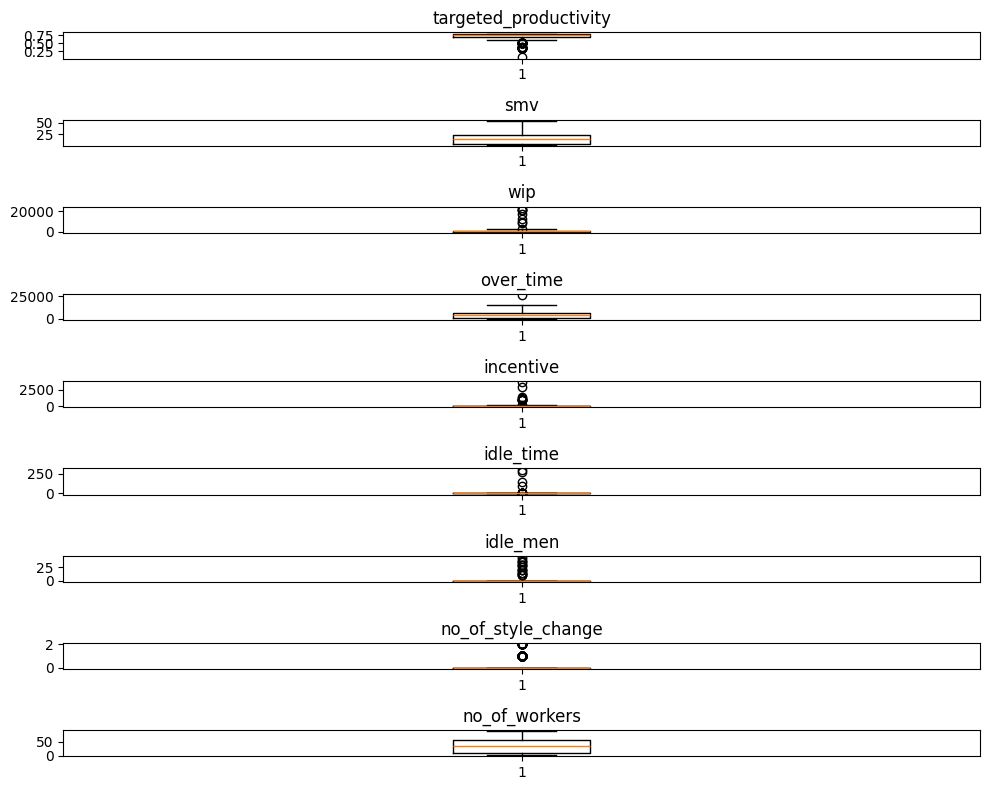

In [60]:
# Create subplots for boxplots
fig, axes = plt.subplots(nrows=len(variables), ncols=1, figsize=(10, 8))

# Create boxplots for each variable
for i, variable in enumerate(variables):
    axes[i].boxplot(df[variable])
    axes[i].set_title(variable)

# Adjust the layout of subplots
plt.tight_layout()

# Display the boxplots
plt.show()



In [50]:
correlation_matrix = df.drop('date', axis=1).corr()

# Set the size of the figure
plt.figure(figsize=(10, 8))

# Plot the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Display the plot
plt.show()




ValueError: could not convert string to float: 'Quarter1'

In [29]:
from sklearn.linear_model import LinearRegression

# Crear una regresión lineal para cada categoría de departamentos
department_categories = df['department'].unique()
regressions = {}

for category in department_categories:
    # Filtrar los datos para la categoría de departamento actual
    category_data = df[df['department'] == category]
    
    # Separar las variables independientes (X) y la variable dependiente (y)
    X = category_data.drop(['department'], axis=1)
    y = category_data['department']
    
    # Crear y ajustar el modelo de regresión lineal
    regression = LinearRegression()
    regression.fit(X, y)
    
    # Guardar el modelo de regresión lineal en el diccionario
    regressions[category] = regression

# Imprimir los modelos de regresión lineal para cada categoría de departamentos
for category, regression in regressions.items():
    print(f"Regresión lineal para la categoría de departamento: {category}")
    print(f"Coeficientes: {regression.coef_}")
    print(f"Intercepto: {regression.intercept_}")
    print()


ValueError: could not convert string to float: '1/1/2015'

In [17]:
import pandas as pd
import pandas as pd
#df.drop('idle_men', axis=1, inplace=True)#columns=['idle_time', 'idle_men', 'no_of_style_change'])
# Check if df variable is defined
if 'df' not in locals():
    # Define df variable
    df = pd.DataFrame()

# Drop the 'idle_men' column from the dataframe
df.drop('idle_men', axis=1, inplace=True)



KeyError: "['idle_men'] not found in axis"